# EB5202 Web Analytics - Retail Rocket - Clustering

## Load libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler

## Load data

In [2]:
sessions_df = pd.read_pickle(os.path.join('data','sessions_newfeatures.pkl'))

In [3]:
sessions_df.iloc[:5, :8]

,visitorid,startdate,enddate,addtocart,transaction,view,pages,pagetime
0,0,2015-09-11 20:49:49.439,2015-09-11 20:55:17.175,[],[],"[285930, 357564, 67045]",3,00:02:43.868000
1,1,2015-08-13 17:46:06.444,2015-08-13 17:46:06.444,[],[],[72028],1,00:00:00
2,2,2015-08-07 17:51:44.567,2015-08-07 18:20:57.845,[],[],"[325215, 325215, 259884, 216305, 342816, 34281...",8,00:04:10.468285
3,3,2015-08-01 07:10:35.296,2015-08-01 07:10:35.296,[],[],[385090],1,00:00:00
4,4,2015-09-15 21:24:27.167,2015-09-15 21:24:27.167,[],[],[177677],1,00:00:00


In [4]:
sessions_df.iloc[:5, -6:]

,pages,pagetime,diffcat,diffprod,prodcat,maxrep
0,3,00:02:43.868000,1.00,1.0,1.0,1
1,1,00:00:00,1.00,1.0,1.0,1
2,8,00:04:10.468285,0.25,0.5,2.0,3
3,1,00:00:00,1.00,1.0,1.0,1
4,1,00:00:00,1.00,1.0,1.0,1


In [5]:
sessions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786340 entries, 0 to 1786339
Data columns (total 12 columns):
visitorid      int64
startdate      datetime64[ns]
enddate        datetime64[ns]
addtocart      object
transaction    object
view           object
pages          int64
pagetime       timedelta64[ns]
diffcat        float64
diffprod       float64
prodcat        float64
maxrep         int64
dtypes: datetime64[ns](2), float64(3), int64(3), object(3), timedelta64[ns](1)
memory usage: 163.5+ MB


## Check for outliers

In [6]:
# Convert page time to secs
sessions_df.loc[:, 'pagetime'] = sessions_df.loc[:, 'pagetime'].map(pd.Timedelta.total_seconds)

In [7]:
sessions_df.iloc[:5, -6:]

,pages,pagetime,diffcat,diffprod,prodcat,maxrep
0,3,163.868000,1.00,1.0,1.0,1
1,1,0.000000,1.00,1.0,1.0,1
2,8,250.468286,0.25,0.5,2.0,3
3,1,0.000000,1.00,1.0,1.0,1
4,1,0.000000,1.00,1.0,1.0,1


In [8]:
sessions_df.iloc[:, -6:].describe()

,pages,pagetime,diffcat,diffprod,prodcat,maxrep
count,1.786340e+06,1.786340e+06,1.786340e+06,1.786340e+06,1.786340e+06,1.786340e+06
mean,1.491492e+00,5.015331e+01,8.866262e-01,9.455984e-01,1.184270e+00,1.151211e+00
std,1.591950e+00,1.764289e+02,2.385307e-01,1.600542e-01,7.023515e-01,5.352076e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.900000e+02,1.799922e+03,1.000000e+00,1.000000e+00,5.400000e+01,5.900000e+01


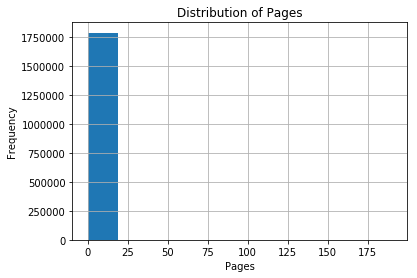

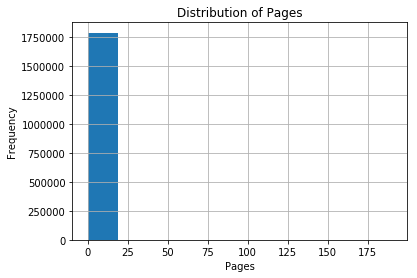

In [9]:
sessions_df['pages'].hist(bins=10)
plt.title('Distribution of Pages')
plt.xlabel('Pages')
plt.ylabel('Frequency')
plt.show()

The maximum pages viewed 190 which works out to 10s per page for a 30 min session. It may be possible.

In [10]:
len(sessions_df.loc[sessions_df['pages'] == 0, :])

6687

These are sessions where no items were viewed, where the visitor only performed addtocart or transact. They do not help to predict items added to cart, so we will remove them.

In [11]:
sessions_df.drop(sessions_df.index[sessions_df['pages'] == 0], inplace=True)
len(sessions_df)

1779653

1779653

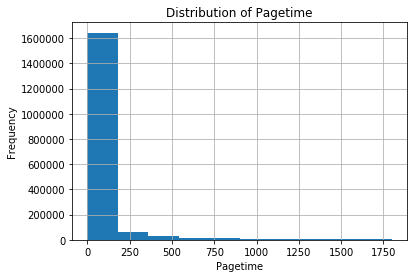

In [12]:
sessions_df['pagetime'].hist(bins=10)
plt.title('Distribution of Pagetime')
plt.xlabel('Pagetime')
plt.ylabel('Frequency')
plt.show()

The maximum pagetime is 1799 secs which is 30mins. This does not look normal.

In [13]:
mins = 20
print('percentage of pagetime greater than %d mins = %f' % (mins, len(sessions_df.loc[sessions_df['pagetime'] > mins * 60, :]) / len(sessions_df) * 100))

percentage of pagetime greater than 20 mins = 0.667771


percentage of pagetime greater than 20 mins = 0.667771


In [14]:
# Remove the sessions where pagetime > 20 mins
sessions_df.drop(sessions_df.index[sessions_df['pagetime'] > 1200], inplace=True)
len(sessions_df)

1767769

## Split data into train / test dataset

In [15]:
X_train, X_test = train_test_split(sessions_df.iloc[:, -6:].values.astype(float), test_size=.5, random_state=552)

In [16]:
X_train[:10]

array([[ 1.        ,  0.        ,  1.        ,  1.        ,  1.        ,
         1.        ],
       [ 1.        ,  0.        ,  1.        ,  1.        ,  1.        ,
         1.        ],
       [ 1.        ,  0.        ,  1.        ,  1.        ,  1.        ,
         1.        ],
       [ 1.        ,  0.        ,  1.        ,  1.        ,  1.        ,
         1.        ],
       [ 1.        ,  0.        ,  1.        ,  1.        ,  1.        ,
         1.        ],
       [ 1.        ,  0.        ,  1.        ,  1.        ,  1.        ,
         1.        ],
       [ 4.        , 14.37533333,  0.25      ,  0.5       ,  2.        ,
         2.        ],
       [ 1.        ,  0.        ,  1.        ,  1.        ,  1.        ,
         1.        ],
       [ 1.        ,  0.        ,  1.        ,  1.        ,  1.        ,
         1.        ],
       [ 7.        , 45.79633333,  0.14285714,  0.28571429,  2.        ,
         6.        ]])

In [17]:
print('train size = %d\ntest_size = %d' % (len(X_train), len(X_test)))

train size = 883884
test_size = 883885


## Preprocess data

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.mean_

array([ 1.49301153, 40.60686659,  0.89177128,  0.95059212,  1.18818457,
        1.15314453])

In [19]:
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [20]:
X_train_std[:10]

## Kmeans Clustering

In [21]:
kmeans_list = [ KMeans(n_clusters=i, max_iter=1000, random_state=435, n_jobs=-1) for i in range(2, 8) ]
kmeans_list

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
     n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
     random_state=435, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
     n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
     random_state=435, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
     n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
     random_state=435, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
     n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
     random_state=435, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
     n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
     random_state=435, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++'

In [22]:
score = [ kmeans_list[i].fit(X_train_std).score(X_train_std) for i in range(len(kmeans_list)) ]
score

[-2784196.9418521742,
 -2153180.95922908,
 -1670218.9766172827,
 -1345850.001683282,
 -1166057.3870613815,
 -1023851.9301882641]

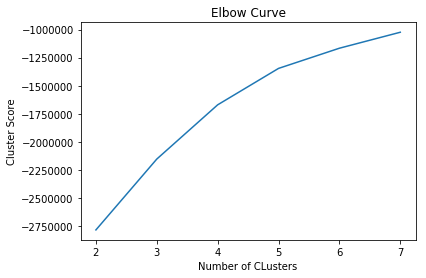

In [23]:
plt.plot(range(2, 8), score)
plt.xlabel('Number of CLusters')
plt.ylabel('Cluster Score')
plt.title('Elbow Curve')
plt.show()

In [24]:
kmeans_list[3].cluster_centers_

In [25]:
scaler.inverse_transform(kmeans_list[3].cluster_centers_)

array([[2.82206280e+00, 1.11050915e+02, 4.57769550e-01, 9.81621619e-01,
        2.32130276e+00, 1.08230918e+00],
       [1.02546966e+00, 2.77722542e+00, 9.99999368e-01, 1.00000000e+00,
        1.00000082e+00, 1.00000000e+00],
       [3.09966072e+00, 1.40682366e+02, 4.29935843e-01, 5.28698584e-01,
        1.33498336e+00, 2.32239644e+00],
       [1.08084068e+01, 1.07648471e+02, 1.92462488e-01, 7.18506268e-01,
        4.86987597e+00, 2.92714665e+00],
       [2.39401291e+00, 7.29070185e+02, 5.86922032e-01, 7.39143338e-01,
        1.35204098e+00, 1.60831595e+00]])

In [26]:
np.bincount(kmeans_list[3].labels_)

array([ 68024, 711945,  71629,  11684,  20602])

In [27]:
len(kmeans_list[3].labels_[kmeans_list[3].labels_>0])

815860

In [28]:
cluster6_centers_df = pd.DataFrame.from_records(scaler.inverse_transform(kmeans_list[4].cluster_centers_), columns=sessions_df.columns[-6:])
cluster6_centers_df['size'] = np.bincount(kmeans_list[4].labels_)
cluster6_centers_df

,pages,pagetime,diffcat,diffprod,prodcat,maxrep,size
0,1.025348,2.777675,1.000000,1.000000,1.000000,1.000000,711940
1,2.712980,138.028996,0.451517,0.539171,1.273186,2.138337,63012
2,11.150676,106.063370,0.152259,0.834297,6.496650,2.096433,6136
3,2.400508,731.744723,0.586044,0.739465,1.355316,1.611760,20466
4,2.918975,111.409284,0.456478,0.977853,2.326036,1.100760,69568
5,7.685007,144.439389,0.246848,0.471663,2.242276,3.928678,12762


In [29]:
cluster5_centers_df = pd.DataFrame.from_records(scaler.inverse_transform(kmeans_list[3].cluster_centers_), columns=sessions_df.columns[-6:])
cluster5_centers_df['size'] = np.bincount(kmeans_list[3].labels_)
cluster5_centers_df

,pages,pagetime,diffcat,diffprod,prodcat,maxrep,size
0,2.822063,111.050915,0.457770,0.981622,2.321303,1.082309,68024
1,1.025470,2.777225,0.999999,1.000000,1.000001,1.000000,711945
2,3.099661,140.682366,0.429936,0.528699,1.334983,2.322396,71629
3,10.808407,107.648471,0.192462,0.718506,4.869876,2.927147,11684
4,2.394013,729.070185,0.586922,0.739143,1.352041,1.608316,20602


In [30]:
cluster4_centers_df = pd.DataFrame.from_records(scaler.inverse_transform(kmeans_list[2].cluster_centers_), columns=sessions_df.columns[-6:])
cluster4_centers_df['size'] = np.bincount(kmeans_list[2].labels_)
cluster4_centers_df

,pages,pagetime,diffcat,diffprod,prodcat,maxrep,size
0,1.023910,2.640963,0.999990,1.000000,1.000014,1.000000,711676
1,10.654306,107.921844,0.194692,0.707104,4.744146,2.978369,12280
2,2.822067,185.006501,0.491582,0.981848,2.223135,1.084525,78344
3,2.928255,223.018936,0.437028,0.526193,1.299835,2.280077,81584


The cluster solution is stable across the train and test set.

We will select the 5 cluster solution as its cluster profiles have the best explanation.

## Validate the cluster solution on the test set

In [31]:
model = kmeans_list[3]
test_pred = model.predict(X_test_std)

In [32]:
test_pred[:10]

array([1, 1, 1, 1, 1, 0, 2, 1, 1, 1], dtype=int32)

In [33]:
cluster_centre_list = [ np.mean(X_test[np.where(test_pred == i)], axis=0) for i in range(len(model.cluster_centers_)) ]

In [34]:
cluster_centre_list

[array([  2.83629206, 109.81330334,   0.45821145,   0.98150593,
          2.31849727,   1.08380761]),
 array([1.02527671, 2.81381955, 0.99999733, 1.        , 1.00000351,
        1.        ]),
 array([  3.09389442, 140.05521764,   0.4294581 ,   0.52870341,
          1.33853485,   2.31766332]),
 array([ 10.80507899, 107.07695953,   0.19435614,   0.72065123,
          4.8892523 ,   2.91905894]),
 array([2.39026024e+00, 7.31116391e+02, 5.89867171e-01, 7.37544649e-01,
        1.34057278e+00, 1.60811328e+00])]

In [35]:
test_cluster5_centers_df = pd.DataFrame.from_records(cluster_centre_list, columns=sessions_df.columns[-6:])
test_cluster5_centers_df['size'] = np.bincount(test_pred)
test_cluster5_centers_df

,pages,pagetime,diffcat,diffprod,prodcat,maxrep,size
0,2.836292,109.813303,0.458211,0.981506,2.318497,1.083808,67822
1,1.025277,2.813820,0.999997,1.000000,1.000004,1.000000,711762
2,3.093894,140.055218,0.429458,0.528703,1.338535,2.317663,71623
3,10.805079,107.076960,0.194356,0.720651,4.889252,2.919059,11774
4,2.390260,731.116391,0.589867,0.737545,1.340573,1.608113,20904


In [36]:
cluster5_centers_df

,pages,pagetime,diffcat,diffprod,prodcat,maxrep,size
0,2.822063,111.050915,0.457770,0.981622,2.321303,1.082309,68024
1,1.025470,2.777225,0.999999,1.000000,1.000001,1.000000,711945
2,3.099661,140.682366,0.429936,0.528699,1.334983,2.322396,71629
3,10.808407,107.648471,0.192462,0.718506,4.869876,2.927147,11684
4,2.394013,729.070185,0.586922,0.739143,1.352041,1.608316,20602


The cluster solution is stable across the train and test set.

## Abnormal users in the data

In [37]:
sessions_df['cluster'] = model.predict(scaler.transform(sessions_df.iloc[:, -6:].values.astype('float')))

In [38]:
sessions_df.iloc[:5, -8:]

,view,pages,pagetime,diffcat,diffprod,prodcat,maxrep,cluster
0,"[285930, 357564, 67045]",3,163.868000,1.00,1.0,1.0,1,1
1,[72028],1,0.000000,1.00,1.0,1.0,1,1
2,"[325215, 325215, 259884, 216305, 342816, 34281...",8,250.468286,0.25,0.5,2.0,3,2
3,[385090],1,0.000000,1.00,1.0,1.0,1,1
4,[177677],1,0.000000,1.00,1.0,1.0,1,1


We will classify visitors which have only sessions of cluster 1 as abnormal.

In [94]:
visitor_df = pd.DataFrame(sessions_df['visitorid'].unique(), columns=['visitorid'])

In [95]:
visitor_df.head()

,visitorid
0,0
1,1
2,2
3,3
4,4


In [57]:
my_tuple = np.zeros((visitor_df['visitorid'].max() + 1, 2))

In [58]:
my_tuple[:5]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [61]:
t1 = datetime.datetime.now()
print('Start time = ', t1)
visitor_gby = sessions_df.groupby('visitorid')
print('Group by visitor id duration = ', datetime.datetime.now() - t1)
for i, df in visitor_gby:
    my_tuple[i, 0] = df['cluster'].map(lambda x: x != 1).any()
    my_tuple[i, 1] = df['transaction'].map(lambda x: bool(x)).any()
    
print('Total duration = ', datetime.datetime.now() - t1)

Start time =  2018-11-04 23:34:03.916747
Group by visitor id duration =  0:00:00.000443


Total duration =  0:15:14.725204


In [62]:
my_tuple[:10]

array([[0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.]])

In [96]:
visitor_df.loc[:, 'normal'] = visitor_df['visitorid'].map(lambda x: my_tuple[x, 0]).astype('bool')

In [97]:
visitor_df.loc[:, 'transact'] = visitor_df['visitorid'].map(lambda x: my_tuple[x, 1]).astype('bool')

In [98]:
visitor_df.head()

,visitorid,normal,transact
0,0,False,False
1,1,False,False
2,2,True,False
3,3,False,False
4,4,False,False


In [99]:
visitor_df.loc[visitor_df['normal'], 'transact'].value_counts()

False    270487
True       6803
Name: transact, dtype: int64

In [100]:
visitor_df.loc[visitor_df['normal'].map(lambda x: not x), 'transact'].value_counts()

False    1119278
True        2806
Name: transact, dtype: int64

In [101]:
print('Conversion Rate for Normal Visitors = %f %%' %
      (visitor_df.loc[visitor_df['normal'], 'transact'].value_counts()[True] / len(visitor_df.loc[visitor_df['normal'], :]) * 100))
print('Conversion Rate for Abnormal Visitors = %f %%' %
      (visitor_df.loc[visitor_df['normal'].map(lambda x: not x), 'transact'].value_counts()[True] /
       len(visitor_df.loc[visitor_df['normal'].map(lambda x: not x), :]) * 100))


Conversion Rate for Normal Visitors = 2.453388 %


Conversion Rate for Abnormal Visitors = 0.250070 %


## Save abnormal visitor data frame to file

In [102]:
visitor_df.to_csv(os.path.join('data', 'visitor.csv'))